FitMin: 368.7937786070713


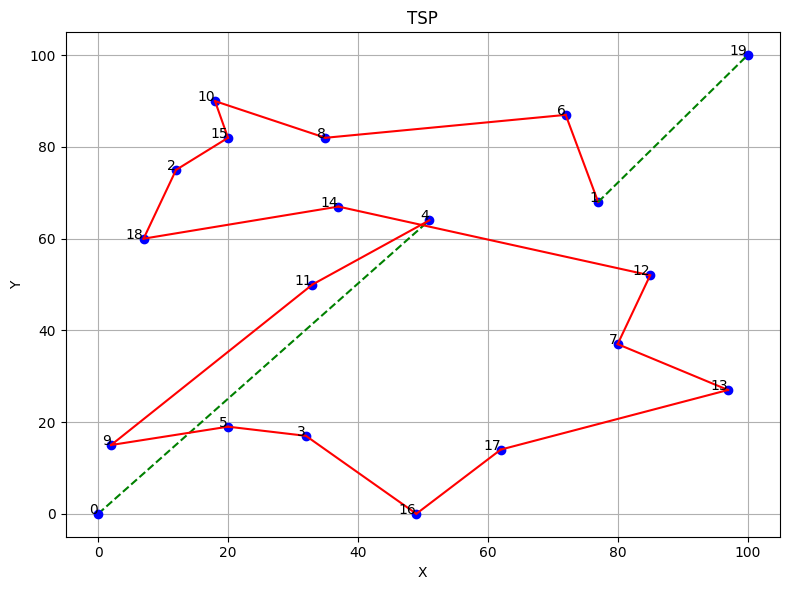

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import libs.genetic_all as ga

numgen = 10000
lpop = 50
lstring   = 20
B = [[0, 0], [77,68], [12,75], [32,17], [51,64], [20,19], [72,87], [80,37], [35,82], [2,15], [18,90], [33,50], [85,52], [97,27], [37,67], [20,82], [49,0], [62,14], [7,60], [100, 100]]
M = 500
Space = np.array([np.ones(lstring) * (-M), np.ones(lstring) * M])
Delta = Space[1, :] / 1000.0

def fitness(road):
  f = 0
  for i in range(0, len(road)-1):
    x, y = int(road[i]), int(road[i+1])
    Dis = math.sqrt(((B[y][0] - B[x][0])**2) + ((B[y][1] - B[x][1])**2))
    f += Dis
  return f

def min_fitness(Fit):
  min_f = min(Fit)
  fit.append(min_f)

def basicGA(Pop, Fit):
  Best,_ = ga.selbest(Pop, Fit, [1, 1, 1])
  Old,_ = ga.selran(Pop, Fit, 47)
  ga.swapgen(Old, 0.20)
  ga.swappart(Best, 0.20)
  Pop = np.vstack((Old, Best))
  return Pop

zeros = np.zeros(900)
Pop = zeros.reshape(50, 18)

for i in range(lpop) :
  Pop[i, :] = np.random.permutation([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

fit = []
evo = []

for gen in range(1, numgen+1):
  Fit = [fitness(perm) for perm in Pop]
  min_fitness(Fit)
  evo.append(min(Fit))
  Pop = basicGA(Pop, Fit)

generations = list(range(numgen + 1))
FitMin = min(fit)
print(f'FitMin: {FitMin}')

gg = go.Figure()
gg.add_trace(go.Scatter(y=fit, mode='lines+markers', name='Fitness Value', hovertemplate='Generation: %{x}<br>Fitness: %{y}'))
gg.update_layout(title="TSP", xaxis_title="Gen", yaxis_title="Vzdialenost", xaxis_range=[0-1, numgen+1], hovermode="closest")
gg.show()

best = Pop[np.argmin(Fit)]
plt.figure(figsize=(8, 6))
plt.plot([0, B[int(best[0])][0]], [0, B[int(best[0])][1]], 'g--')

for i, point in enumerate(B):
    plt.plot(point[0], point[1], 'bo')
    plt.text(point[0], point[1], f'{i}', ha='right')

for i in range(len(best) - 1): 
    start = B[int(best[i])]
    end = B[int(best[i + 1])]
    plt.plot([start[0], end[0]], [start[1], end[1]], 'r-')

plt.plot([B[int(best[-1])][0], 100], [B[int(best[-1])][1], 100], 'g--')

plt.title("TSP")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()
plt.show()
